## Outstanding players and Player outlier detection

In [110]:
# import relavent packages.
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
# The following contains indiidual player information and insite.
df_draft = pd.read_csv('databasebasketball/draft.txt') # --> Error {Performed some pre-processing}
df_player_allstar = pd.read_csv('databasebasketball/player_allstar.txt')
df_player_playoffs = pd.read_csv('databasebasketball/player_playoffs.txt')
df_player_playoffs_career = pd.read_csv('databasebasketball/player_playoffs_career.txt')
df_player_regular_season = pd.read_csv('databasebasketball/player_regular_season.txt')
df_player_regular_season_career = pd.read_csv('databasebasketball/player_regular_season_career.txt')
df_players = pd.read_csv('databasebasketball/players.txt')

### Create a scat-plot for players during the regular season

In [112]:
df_player_regular_season_career.columns
'''
Drop the following:
ilkid,
firstname,
lastname,
leag
'''
features_regular_season = df_player_regular_season_career.drop(columns=['ilkid', 'firstname', 'lastname', 'leag'])

features_regular_season.head()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,256,3200,1465,283,563,846,85,71,69,247,484,1236,620,321,225,3,0
1,1560,57446,38387,2975,9394,17440,5660,1160,3189,2527,4657,28307,15837,9304,6712,18,1
2,586,15633,8553,219,868,1087,2079,487,46,963,1107,7943,3514,1161,1051,1339,474
3,236,4808,1830,275,501,776,266,184,82,309,485,1726,720,529,372,76,18
4,672,24862,13338,1498,3976,5474,1847,718,556,1911,1845,10215,4789,4427,3614,477,146


### Create a scat-plot for players during the playoff season

In [113]:
df_player_playoffs_career.columns
'''
Drop the following:
ilkid,
firstname,
lastname,
leag
'''
features_playoffs_season = df_player_playoffs_career.drop(columns=['ilkid', 'firstname', 'lastname', 'leag'])

features_playoffs_season.head()

,gp,minutes,pts,dreb,oreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,17,106,38,17,3,20,3,0,1,11,11,40,18,4,2,0,0
1,237,8851,5762,833,355,2481,767,150,399,404,787,4422,2356,1419,1050,4,0
2,15,415,195,18,5,23,35,7,1,22,37,187,69,45,43,49,14
3,13,178,68,24,17,41,11,4,4,4,14,63,24,24,20,3,0
4,13,226,68,0,0,42,23,0,0,0,18,54,22,29,24,0,0


In [114]:
# Let us try and project our data into two dimensions.
X_norm = (features_playoffs_season - features_playoffs_season.min())/(features_playoffs_season.max() - features_playoffs_season.min())

In [115]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

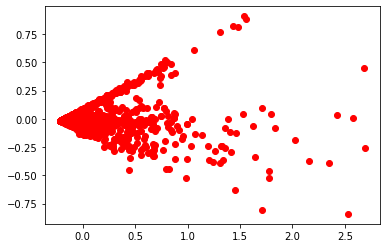

In [116]:
plt.scatter(transformed[0], transformed[1], c='red', label='0')

## Create our model

In [117]:
# km = KMeans(n_clusters=3)
km = KMeans(n_clusters=3)

# train our model fit an predict.
# This simple fit and predict a cluster that a player belongs to...
y_predicted = km.fit_predict(features_playoffs_season)

In [118]:
# visualizing the cluster.
features_playoffs_season['cluster'] = y_predicted
features_playoffs_season.head()

,gp,minutes,pts,dreb,oreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm,cluster
0,17,106,38,17,3,20,3,0,1,11,11,40,18,4,2,0,0,1
1,237,8851,5762,833,355,2481,767,150,399,404,787,4422,2356,1419,1050,4,0,2
2,15,415,195,18,5,23,35,7,1,22,37,187,69,45,43,49,14,1
3,13,178,68,24,17,41,11,4,4,4,14,63,24,24,20,3,0,1
4,13,226,68,0,0,42,23,0,0,0,18,54,22,29,24,0,0,1


In [119]:
# visualizing the results.
df0 = features_playoffs_season[features_playoffs_season.cluster == 0]
df1 = features_playoffs_season[features_playoffs_season.cluster == 1]
df2 = features_playoffs_season[features_playoffs_season.cluster == 2]

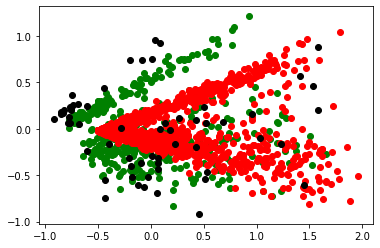

In [120]:
# plot the above into three different data frames.
df0_norm = (df0 - df0.min())/(df0.max() - df0.min())
df1_norm = (df1 - df1.min())/(df1.max() - df1.min())
df2_norm = (df2 - df2.min())/(df2.max() - df2.min())

df0_norm = df0_norm.fillna(0)
df1_norm = df1_norm.fillna(0)
df2_norm = df2_norm.fillna(0)

# transform into a 2d space.
df0_transformed = pd.DataFrame(pca.fit_transform(df0_norm))
df1_transformed = pd.DataFrame(pca.fit_transform(df1_norm))
df2_transformed = pd.DataFrame(pca.fit_transform(df2_norm))

# plot the clusters into using scatter plot
plt.scatter(df0_transformed[0], df0_transformed[1], color='green')
plt.scatter(df1_transformed[0], df1_transformed[1], color='red')
plt.scatter(df2_transformed[0], df2_transformed[1], color='black')

In [121]:
print(km.inertia_)

803398841.4483265
